This is the version using Keras to learn and predict the result, for data analysis, pls. refer to another version:

[https://www.kaggle.com/sunixliu/bank-customer-churn-model](http://)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load all data in
all_data = pd.read_csv("../input/Churn_Modelling.csv")

In [3]:
#One-encoding Gender, Geography and NumOfProducts
dummy_gender = pd.get_dummies(all_data['Gender'], prefix='Gender')
dummy_geo = pd.get_dummies(all_data['Geography'],prefix = 'Geo')
dummy_NoOfProducts=pd.get_dummies(all_data['NumOfProducts'],prefix='NOP')

In [4]:
#Dealing with Age,catogorized it into 7 sections
bins = [18,22,34,40,60,80,100]
labels = ['18-22','23-34','35-40','41-60','61-80','81-100']
dummy_age_labels=pd.cut(all_data['Age'],bins,labels=labels,right=False)

In [5]:
all_data['Age_labeled']= dummy_age_labels

In [6]:
dummy_age=pd.get_dummies(all_data['Age_labeled'],prefix='Age')

In [7]:
# Dealing with creditscore, catogorizing it into 5 catogories
bins =[300,579,669,739,799,850]
labels =['Very Poor','Fair','Good','Very Good','Exceptional']
dummy_crdscore_labels=pd.cut(all_data['CreditScore'],bins,labels=labels)
all_data['CreditScore_labled']= dummy_crdscore_labels
dummy_creditscore = pd.get_dummies(all_data['CreditScore_labled'], prefix = 'CreditLevel')

In [8]:
#Tenure catogorized into 4 sections
bins = [0,1,5,8,11]
labels = ['0-1','1-5','5-8','8-11']
dummy_tenure_labels=pd.cut(all_data['Tenure'],bins,labels=labels,right=False)
all_data['Tenure_labeled']= dummy_tenure_labels
dummy_tenure = pd.get_dummies(all_data['Tenure_labeled'],prefix = 'Tenure')

In [9]:
# Get Balance and EstimatedSalary standard
from sklearn.preprocessing import StandardScaler
all_data['Balance'] = StandardScaler().fit_transform(all_data.filter(['Balance']))
all_data['EstimatedSalary'] = StandardScaler().fit_transform(all_data.filter(['EstimatedSalary']))

In [10]:
data_combined = pd.concat([all_data,dummy_age,dummy_tenure,dummy_creditscore,dummy_geo,dummy_gender,dummy_NoOfProducts],axis =1)

In [11]:
data_combined.drop(['Gender', 'Age', 'CreditScore','Geography','NumOfProducts','Tenure'], axis=1, inplace=True)

In [12]:
data_combined.drop(['Surname','CustomerId','Age_labeled','CreditScore_labled','Tenure_labeled'],
                   axis=1,inplace = True)

In [13]:
y_data=data_combined['Exited']
data_combined.drop(['Exited'],axis=1, inplace = True)
X_data = data_combined

X_data.set_index('RowNumber')
X_data.reset_index(drop = True, inplace = True)
X_data.drop('RowNumber',axis =1, inplace = True)

In [14]:
#split data into train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.2,random_state=2)

In [15]:
import tensorflow as tf

model = tf.keras.models.Sequential()

In [16]:
model.add(tf.keras.layers.Dense(units = 128,
                                input_dim = 28, #totally 28 features as input
                                use_bias = True,
                                kernel_initializer ='uniform',
                                activation ='relu',
                                bias_initializer ='zeros'
                                ))
#add 2 hidden layers
for i in range(0,2):
    model.add(tf.keras.layers.Dense(units=128, kernel_initializer='normal',
                     bias_initializer='zeros',activation='relu'))
    model.add(tf.keras.layers.Dropout(.40)) # dropout some data to avoid overfitting


#output layer
model.add(tf.keras.layers.Dense(units =2,
                               activation ='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
optimizer = tf.keras.optimizers.Adam(0.00001) #use Adam as optimizer and the learning rate is 0.00001
loss_function = "sparse_categorical_crossentropy"

model.compile(optimizer = optimizer, loss = loss_function, metrics=['accuracy'])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3712      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 36,994
Trainable params: 36,994
Non-trainable params: 0
_________________________________________________________________


In [19]:
train_history = model.fit(x = x_train,
                          y = y_train,
                          validation_split = 0.2, #use 20% of train data as validation data
                          epochs = 200,
                          batch_size = 50,
                          verbose =1
                         )    

Train on 6400 samples, validate on 1600 samples
Epoch 1/200
6400/6400 [==============================] - 1s 218us/sample - loss: 0.6891 - acc: 0.6197 - val_loss: 0.6810 - val_acc: 0.8062
Epoch 2/200
6400/6400 [==============================] - 0s 74us/sample - loss: 0.6746 - acc: 0.7831 - val_loss: 0.6642 - val_acc: 0.8062
Epoch 3/200
6400/6400 [==============================] - 0s 75us/sample - loss: 0.6557 - acc: 0.7897 - val_loss: 0.6402 - val_acc: 0.8062
Epoch 4/200
6400/6400 [==============================] - 0s 72us/sample - loss: 0.6298 - acc: 0.7900 - val_loss: 0.6073 - val_acc: 0.8062
Epoch 5/200
6400/6400 [==============================] - 0s 74us/sample - loss: 0.5958 - acc: 0.7900 - val_loss: 0.5676 - val_acc: 0.8062
Epoch 6/200
6400/6400 [==============================] - 0s 73us/sample - loss: 0.5588 - acc: 0.7900 - val_loss: 0.5279 - val_acc: 0.8062
Epoch 7/200
6400/6400 [==============================] - 0s 75us/sample - loss: 0.5253 - acc: 0.7900 - val_loss: 0.4961 - v

6400/6400 [==============================] - 0s 72us/sample - loss: 0.3774 - acc: 0.8425 - val_loss: 0.3558 - val_acc: 0.8494
Epoch 60/200
6400/6400 [==============================] - 1s 83us/sample - loss: 0.3772 - acc: 0.8422 - val_loss: 0.3556 - val_acc: 0.8481
Epoch 61/200
6400/6400 [==============================] - 1s 83us/sample - loss: 0.3763 - acc: 0.8416 - val_loss: 0.3553 - val_acc: 0.8487
Epoch 62/200
6400/6400 [==============================] - 1s 86us/sample - loss: 0.3750 - acc: 0.8439 - val_loss: 0.3551 - val_acc: 0.8494
Epoch 63/200
6400/6400 [==============================] - 1s 84us/sample - loss: 0.3745 - acc: 0.8433 - val_loss: 0.3549 - val_acc: 0.8487
Epoch 64/200
6400/6400 [==============================] - 1s 83us/sample - loss: 0.3763 - acc: 0.8425 - val_loss: 0.3547 - val_acc: 0.8494
Epoch 65/200
6400/6400 [==============================] - 1s 84us/sample - loss: 0.3749 - acc: 0.8425 - val_loss: 0.3544 - val_acc: 0.8494
Epoch 66/200
6400/6400 [================

Epoch 118/200
6400/6400 [==============================] - 0s 75us/sample - loss: 0.3659 - acc: 0.8512 - val_loss: 0.3498 - val_acc: 0.8537
Epoch 119/200
6400/6400 [==============================] - 0s 74us/sample - loss: 0.3643 - acc: 0.8497 - val_loss: 0.3498 - val_acc: 0.8537
Epoch 120/200
6400/6400 [==============================] - 0s 73us/sample - loss: 0.3633 - acc: 0.8502 - val_loss: 0.3497 - val_acc: 0.8537
Epoch 121/200
6400/6400 [==============================] - 0s 72us/sample - loss: 0.3626 - acc: 0.8497 - val_loss: 0.3497 - val_acc: 0.8537
Epoch 122/200
6400/6400 [==============================] - 0s 74us/sample - loss: 0.3631 - acc: 0.8492 - val_loss: 0.3497 - val_acc: 0.8537
Epoch 123/200
6400/6400 [==============================] - 0s 73us/sample - loss: 0.3624 - acc: 0.8500 - val_loss: 0.3496 - val_acc: 0.8531
Epoch 124/200
6400/6400 [==============================] - 0s 74us/sample - loss: 0.3634 - acc: 0.8494 - val_loss: 0.3496 - val_acc: 0.8531
Epoch 125/200
6400/6

6400/6400 [==============================] - 0s 72us/sample - loss: 0.3557 - acc: 0.8553 - val_loss: 0.3483 - val_acc: 0.8531
Epoch 177/200
6400/6400 [==============================] - 0s 73us/sample - loss: 0.3565 - acc: 0.8531 - val_loss: 0.3483 - val_acc: 0.8531
Epoch 178/200
6400/6400 [==============================] - 0s 74us/sample - loss: 0.3555 - acc: 0.8544 - val_loss: 0.3482 - val_acc: 0.8531
Epoch 179/200
6400/6400 [==============================] - 0s 73us/sample - loss: 0.3553 - acc: 0.8550 - val_loss: 0.3483 - val_acc: 0.8512
Epoch 180/200
6400/6400 [==============================] - 0s 75us/sample - loss: 0.3558 - acc: 0.8541 - val_loss: 0.3482 - val_acc: 0.8531
Epoch 181/200
6400/6400 [==============================] - 0s 74us/sample - loss: 0.3558 - acc: 0.8537 - val_loss: 0.3483 - val_acc: 0.8519
Epoch 182/200
6400/6400 [==============================] - 0s 75us/sample - loss: 0.3553 - acc: 0.8512 - val_loss: 0.3483 - val_acc: 0.8519
Epoch 183/200
6400/6400 [=========

In [20]:
def v_train_history(trainhist, train_metrics, valid_metrics):
    plt.plot(trainhist.history[train_metrics])
    plt.plot(trainhist.history[valid_metrics])
    plt.title('Training metrics')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

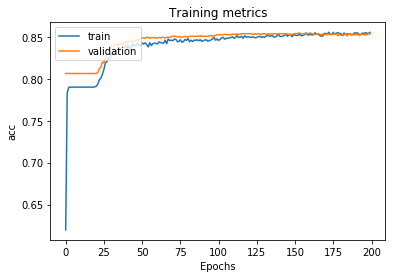

In [21]:
v_train_history(train_history,'acc','val_acc')

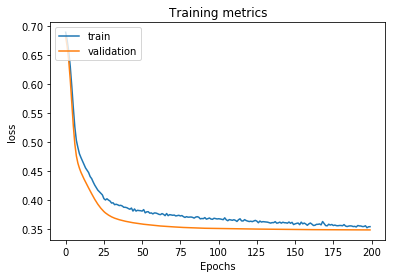

In [22]:
v_train_history(train_history,'loss','val_loss')

In [23]:
evaluate_result = model.evaluate(x=x_test,
                               y=y_test)

2000/2000 [==============================] - 0s 60us/sample - loss: 0.3601 - acc: 0.8450
